In [1]:
print('hello world')

hello world


*[
  _type == "media" &&
  type in ["movie", "show"]
]{
  "title": title,
  "EndedAt": *[
    _type == "session" &&
    media._ref == ^._id &&
    startedAt >= "2025-01-01T00:00:00Z" &&
    startedAt <  "2026-01-01T00:00:00Z"
  ]
  | order(startedAt desc)[0].startedAt
}
[defined(EndedAt)]
| order(EndedAt desc)


In [5]:
pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.0/207.0 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 2.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 25.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 19.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import os
import pandas as pd
from urllib.parse import quote


In [3]:
from project_secrets import READ_TOKEN

In [4]:
import requests
import pandas as pd
from urllib.parse import quote
from project_secrets import READ_TOKEN  # your token

# --- CONFIG ---
PROJECT_ID = "z417aens"
DATASET = "production"
TOKEN = READ_TOKEN

# GROQ: latest 2025 session per media (book, movie, show)
groq = """
*[
  _type == "media" &&
  type in ["book", "movie", "show"]
]{
  "title": title,
  "media_type": type,
  "EndedAt": *[
    _type == "session" &&
    media._ref == ^._id &&
    startedAt >= "2025-01-01T00:00:00Z" &&
    startedAt <  "2026-01-01T00:00:00Z"
  ] | order(startedAt desc)[0].startedAt
}
[defined(EndedAt)]
| order(EndedAt desc)
"""

# Build URL
url = f"https://{PROJECT_ID}.api.sanity.io/v2021-03-25/data/query/{DATASET}?query={quote(groq)}"

# Headers with auth token
headers = {"Authorization": f"Bearer {TOKEN}"}

# Fetch data
response = requests.get(url, headers=headers)
if not response.ok:
    print("Status:", response.status_code)
    print("Body:", response.text)
    response.raise_for_status()

result = response.json()["result"]

# Build DataFrame with three columns: datetime, title, media_type
df = pd.DataFrame(
    {
        "datetime":   [item["EndedAt"]    for item in result],
        "title":      [item["title"]      for item in result],
        "media_type": [item["media_type"] for item in result],
    }
)

# Optional: convert to proper datetimes
df["datetime"] = pd.to_datetime(df["datetime"])

df.head()


,datetime,title,media_type
0,2025-12-05 02:39:06.198000+00:00,Fleabag,show
1,2025-12-05 02:39:00+00:00,Friday Night Lights,show
2,2025-11-30 02:39:00+00:00,Sentimental Value,movie
3,2025-11-27 04:10:00+00:00,The Master,movie
4,2025-11-20 02:39:00+00:00,In Treatment,show


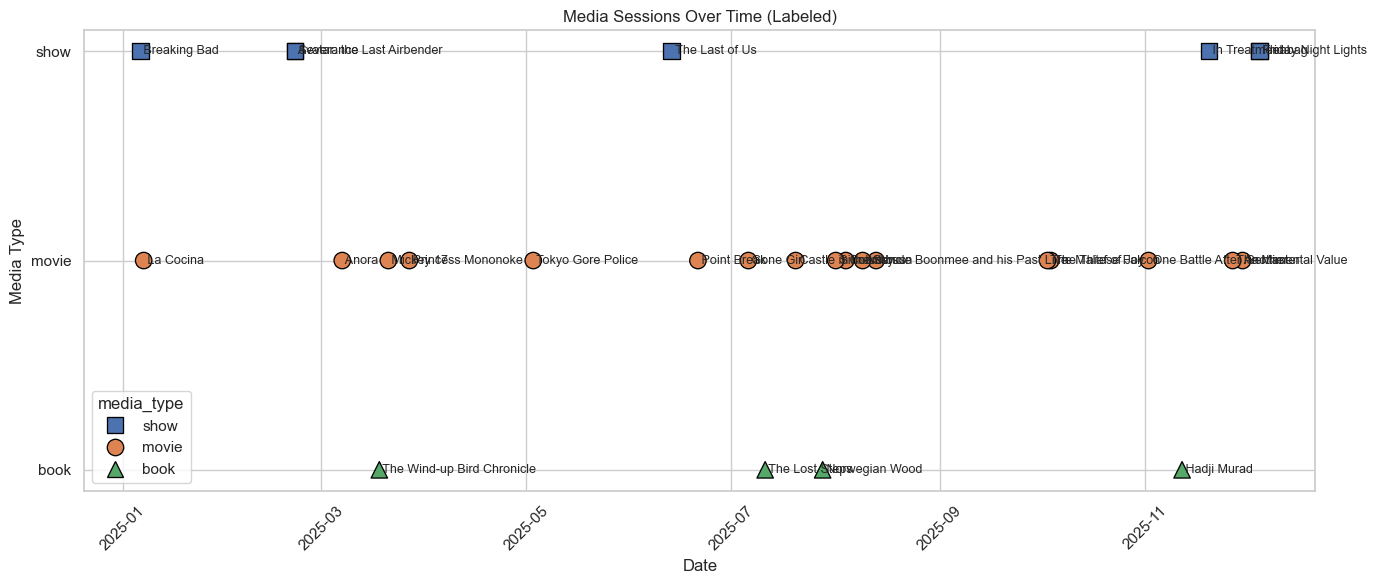

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# ensure datetime is proper dtype
df["datetime"] = pd.to_datetime(df["datetime"])

sns.set_theme(style="whitegrid")

markers = {
    "movie": "o",
    "show": "s",
    "book": "^"
}

plt.figure(figsize=(14, 6))

ax = sns.scatterplot(
    data=df,
    x="datetime",
    y="media_type",
    hue="media_type",
    style="media_type",
    markers=markers,
    s=140,
    edgecolor="black",
)

# --- Add labels for each point ---
for _, row in df.iterrows():
    ax.text(
        row["datetime"],
        row["media_type"],
        f" {row['title']}",      # leading space for nicer offset
        fontsize=9,
        verticalalignment="center",
        horizontalalignment="left"
    )

plt.title("Media Sessions Over Time (Labeled)")
plt.xlabel("Date")
plt.ylabel("Media Type")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.7/359.7 kB 12.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.4/426.4 kB 29.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import plotly.express as px
import pandas as pd

# Make sure df has these columns: ["title", "media_type"]
# and (optionally) "datetime" if you used it earlier

# 1. Give every title the same size
df_treemap = df.copy()
df_treemap["size"] = 1  # constant area per title

# 2. (Optional) sort so the layout is more pleasing
df_treemap = df_treemap.sort_values(["media_type", "title"])

# 3. Build treemap: media_type as parent, title as leaf
fig = px.treemap(
    df_treemap,
    path=["media_type", "title"],  # nesting: group by media type
    values="size",                 # all leaves same area
    color="media_type",            # color by media type
    color_discrete_map={
        "show":  "#d62728",  # tweak these if you want
        "movie": "#1f77b4",
        "book":  "#2ca02c",
    },
    title="Media Treemap (books / movies / shows)",
)

# Make borders a bit more visible (like in your screenshot)
fig.update_traces(
    marker=dict(line=dict(width=1, color="white"))
)

fig.update_layout(
    margin=dict(t=40, l=0, r=0, b=0)
)

fig.show()


In [10]:
# duration in MINUTES (movie runtimes, binge times, or reading times)

duration_lookup = {
    # --- MOVIES ---
    "Uncle Boonmee Who Can Recall His Past Lives": 114,   # 1h54
    "The Master": 138,                                   # 2h18
    "Princess Mononoke": 134,                           # 2h14
    "Mickey 17": 137,                                   # ~2h17
    "Columbus": 104,                                    # 1h44
    "Castle in the Sky": 124,                           # 2h04
    "Tokyo Gore Police": 110,                           # 1h50
    "The Maltese Falcon": 100,                          # 1h40
    "Sinners": 138,                                     # 2h18
    "La Cocina": 139,                                   # 2h19
    "Anora": 139,                                       # 2h19
    "Point Break": 122,                                 # 2h02
    "Aftersun": 102,                                    # 1h42
    "The Thief of Joy": 17,                             # short film
    "Sentimental Value": 133,                           # 2h13
    "One Battle After Another": 162,                    # 2h42
    "Gone Girl": 149,                                   # 2h29

    # --- TV SHOWS (total series binge times, approx) ---
    #"The Last of Us": 524,          # sum of S1 episodes
    #"Severance": 929,               # ~15h29m total so far
    #"Breaking Bad": 2995,           # ~49h55m
    #"Friday Night Lights": 3420,    # 76 eps × ~45m
    #"Avatar: the Last Airbender": 1403,  # 61 eps × 23m
    #"Fleabag": 360,                 # ~6 hours total
    #"In Treatment": 3380,           # ~130 eps × 26m

    # --- BOOKS (reading time; ~1 min per page unless noted) ---
    "Hadji Murad": 158,             # ReadingLength est.
    "Norwegian Wood": 300,          # ~300 pages ⇒ ~300 min
    "The Lost Steps": 256,          # ~256 pages ⇒ ~256 min
    "The Wind-Up Bird Chronicle": 624,  # 624 pages ⇒ ~624 min
}

# If your DataFrame is called df and has columns:
#   - 'title' (string)
#   - 'media_type' (e.g. 'book'/'movie'/'show')
# you can do:

# Attach duration column
df["duration_min"] = df["title"].map(duration_lookup)

# Fallback for anything missing in the lookup
fallback_minutes = 120  # or df["duration_min"].median()
df["duration_min"] = df["duration_min"].fillna(fallback_minutes)

import plotly.express as px

fig = px.treemap(
    df,
    path=["media_type", "title"],
    values="duration_min",          # <-- rectangle size driven by time
    color="media_type",
    title="Media Treemap Weighted by Engagement Time (minutes)",
)

fig.update_traces(textinfo="label+value")  # show title + minutes
fig.show()


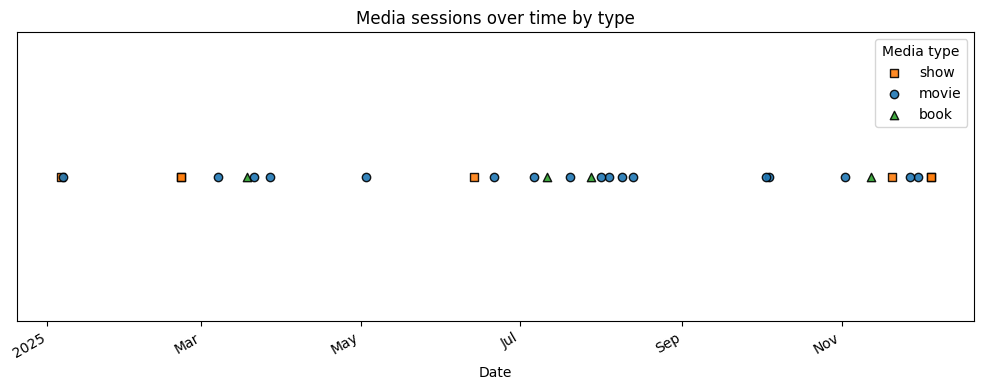

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Make sure datetime is a datetime dtype
df["datetime"] = pd.to_datetime(df["datetime"])

# Marker + color per media type
markers = {
    "movie": "o",   # circle
    "show": "s",    # square
    "book": "^",    # triangle
}
colors = {
    "movie": "tab:blue",
    "show": "tab:orange",
    "book": "tab:green",
}

fig, ax = plt.subplots(figsize=(10, 4))

for mtype in df["media_type"].unique():
    subset = df[df["media_type"] == mtype]
    ax.scatter(
        subset["datetime"],
        [0] * len(subset),                  # all on one horizontal line
        marker=markers.get(mtype, "o"),
        color=colors.get(mtype, "gray"),
        label=mtype,
        alpha=0.9,
        edgecolor="black",
    )

# Prettify axes
ax.yaxis.set_visible(False)
ax.set_xlabel("Date")
ax.set_title("Media sessions over time by type")

# Nicer date formatting
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
fig.autofmt_xdate()

ax.legend(title="Media type")
plt.tight_layout()
plt.show()


In [12]:
# duration in MINUTES (movie runtimes, binge times, or reading times)

duration_lookup = {
    # --- MOVIES ---
    "Uncle Boonmee Who Can Recall His Past Lives": 114,   # 1h54
    "The Master": 138,                                   # 2h18
    "Princess Mononoke": 134,                           # 2h14
    "Mickey 17": 137,                                   # ~2h17
    "Columbus": 104,                                    # 1h44
    "Castle in the Sky": 124,                           # 2h04
    "Tokyo Gore Police": 110,                           # 1h50
    "The Maltese Falcon": 100,                          # 1h40
    "Sinners": 138,                                     # 2h18
    "La Cocina": 139,                                   # 2h19
    "Anora": 139,                                       # 2h19
    "Point Break": 122,                                 # 2h02
    "Aftersun": 102,                                    # 1h42
    "The Thief of Joy": 17,                             # short film
    "Sentimental Value": 133,                           # 2h13
    "One Battle After Another": 162,                    # 2h42
    "Gone Girl": 149,                                   # 2h29

    # --- TV SHOWS (total series binge times, approx) ---
    "The Last of Us": 524,          # sum of S1 episodes
    "Severance": 929,               # ~15h29m total so far
    "Breaking Bad": 2995,           # ~49h55m
    "Friday Night Lights": 3420,    # 76 eps × ~45m
    "Avatar: the Last Airbender": 1403,  # 61 eps × 23m
    "Fleabag": 360,                 # ~6 hours total
    "In Treatment": 3380,           # ~130 eps × 26m

    # --- BOOKS (reading time; ~1 min per page unless noted) ---
    "Hadji Murad": 158,             # ReadingLength est.
    "Norwegian Wood": 300,          # ~300 pages ⇒ ~300 min
    "The Lost Steps": 256,          # ~256 pages ⇒ ~256 min
    "The Wind-Up Bird Chronicle": 624,  # 624 pages ⇒ ~624 min
}

# If your DataFrame is called df and has columns:
#   - 'title' (string)
#   - 'media_type' (e.g. 'book'/'movie'/'show')
# you can do:

# Attach duration column
df["duration_min"] = df["title"].map(duration_lookup)

# Fallback for anything missing in the lookup
fallback_minutes = 120  # or df["duration_min"].median()
df["duration_min"] = df["duration_min"].fillna(fallback_minutes)

import plotly.express as px

fig = px.treemap(
    df,
    path=["media_type", "title"],
    values="duration_min",          # <-- rectangle size driven by time
    color="media_type",
    title="Media Treemap Weighted by Engagement Time (minutes)",
)

fig.update_traces(textinfo="label+value")  # show title + minutes
fig.show()


In [13]:
import pandas as pd
import numpy as np
import plotly.express as px

# ------------------------------------------------------------
# 1. Define your raw media data
#    (If you already have this from elsewhere, just replace
#     this list with your own and keep the rest of the script.)
# ------------------------------------------------------------

media_items = [
    # --- MOVIES ---
    {"title": "Uncle Boonmee Who Can Recall His Past Lives", "media_type": "movie"},
    {"title": "The Master",                              "media_type": "movie"},
    {"title": "Princess Mononoke",                       "media_type": "movie"},
    {"title": "Mickey 17",                               "media_type": "movie"},
    {"title": "Columbus",                                "media_type": "movie"},
    {"title": "Castle in the Sky",                       "media_type": "movie"},
    {"title": "Tokyo Gore Police",                       "media_type": "movie"},
    {"title": "The Maltese Falcon",                      "media_type": "movie"},
    {"title": "Sinners",                                 "media_type": "movie"},
    {"title": "La Cocina",                               "media_type": "movie"},
    {"title": "Anora",                                   "media_type": "movie"},
    {"title": "Point Break",                             "media_type": "movie"},
    {"title": "Aftersun",                                "media_type": "movie"},
    {"title": "The Thief of Joy",                        "media_type": "movie"},
    {"title": "Sentimental Value",                       "media_type": "movie"},
    {"title": "One Battle After Another",                "media_type": "movie"},
    {"title": "Gone Girl",                               "media_type": "movie"},

    # --- TV SHOWS ---
    {"title": "The Last of Us",                  "media_type": "show"},
    {"title": "Severance",                       "media_type": "show"},
    {"title": "Breaking Bad",                    "media_type": "show"},
    {"title": "Friday Night Lights",            "media_type": "show"},
    {"title": "Avatar: the Last Airbender",     "media_type": "show"},
    {"title": "Fleabag",                        "media_type": "show"},
    {"title": "In Treatment",                   "media_type": "show"},

    # --- BOOKS ---
    {"title": "Hadji Murad",                    "media_type": "book"},
    {"title": "Norwegian Wood",                 "media_type": "book"},
    {"title": "The Lost Steps",                 "media_type": "book"},
    {"title": "The Wind-Up Bird Chronicle",     "media_type": "book"},
]

media_df = pd.DataFrame(media_items)

# ------------------------------------------------------------
# 2. Duration lookup (minutes)
# ------------------------------------------------------------

duration_lookup = {
    # --- MOVIES ---
    "Uncle Boonmee Who Can Recall His Past Lives": 114,   # 1h54
    "The Master": 138,                                   # 2h18
    "Princess Mononoke": 134,                           # 2h14
    "Mickey 17": 137,                                   # ~2h17
    "Columbus": 104,                                    # 1h44
    "Castle in the Sky": 124,                           # 2h04
    "Tokyo Gore Police": 110,                           # 1h50
    "The Maltese Falcon": 100,                          # 1h40
    "Sinners": 138,                                     # 2h18
    "La Cocina": 139,                                   # 2h19
    "Anora": 139,                                       # 2h19
    "Point Break": 122,                                 # 2h02
    "Aftersun": 102,                                    # 1h42
    "The Thief of Joy": 17,                             # short film
    "Sentimental Value": 133,                           # 2h13
    "One Battle After Another": 162,                    # 2h42
    "Gone Girl": 149,                                   # 2h29

    # --- TV SHOWS (approx total series times) ---
    "The Last of Us": 524,               # sum of S1 episodes
    "Severance": 929,                    # ~15h29m so far
    "Breaking Bad": 2995,                # ~49h55m
    "Friday Night Lights": 3420,         # ~76 eps × ~45m
    "Avatar: the Last Airbender": 1403,  # 61 eps × 23m
    "Fleabag": 360,                      # ~6 hours
    "In Treatment": 3380,                # ~130 eps × 26m

    # --- BOOKS (rough reading time, ~1 min/page) ---
    "Hadji Murad": 158,
    "Norwegian Wood": 300,
    "The Lost Steps": 256,
    "The Wind-Up Bird Chronicle": 624,
}

# ------------------------------------------------------------
# 3. Attach duration + fallback for anything missing
# ------------------------------------------------------------

media_df["duration_min"] = media_df["title"].map(duration_lookup)

# Use a fallback for any titles missing from the lookup
fallback_minutes = 120
media_df["duration_min"] = media_df["duration_min"].fillna(fallback_minutes)

# ------------------------------------------------------------
# 4. Add visual grouping: Shows vs Movies & Books
# ------------------------------------------------------------

media_df["media_group"] = np.where(
    media_df["media_type"] == "show",
    "Shows",
    "Movies & Books"
)

# ------------------------------------------------------------
# 5. Build treemap with visual separation
# ------------------------------------------------------------

fig = px.treemap(
    media_df,
    path=["media_group", "media_type", "title"],
    values="duration_min",
    color="media_group",  # distinguishes Shows vs Movies & Books
    title="Media Treemap – Shows vs Movies & Books (weighted by duration)",
)

fig.update_traces(textinfo="label+value")  # show title + minutes
fig.show()


In [14]:
import pandas as pd
import numpy as np
import plotly.express as px

# ------------------------------------------------------------
# 1. Media items (movies + books only)
# ------------------------------------------------------------
media_items = [
    {"title": "Uncle Boonmee Who Can Recall His Past Lives", "media_type": "movie"},
    {"title": "The Master",                              "media_type": "movie"},
    {"title": "Princess Mononoke",                       "media_type": "movie"},
    {"title": "Mickey 17",                               "media_type": "movie"},
    {"title": "Columbus",                                "media_type": "movie"},
    {"title": "Castle in the Sky",                       "media_type": "movie"},
    {"title": "Tokyo Gore Police",                       "media_type": "movie"},
    {"title": "The Maltese Falcon",                      "media_type": "movie"},
    {"title": "Sinners",                                 "media_type": "movie"},
    {"title": "La Cocina",                               "media_type": "movie"},
    {"title": "Anora",                                   "media_type": "movie"},
    {"title": "Point Break",                             "media_type": "movie"},
    {"title": "Aftersun",                                "media_type": "movie"},
    {"title": "The Thief of Joy",                        "media_type": "movie"},
    {"title": "Sentimental Value",                       "media_type": "movie"},
    {"title": "One Battle After Another",                "media_type": "movie"},
    {"title": "Gone Girl",                               "media_type": "movie"},

    # --- BOOKS ---
    {"title": "Hadji Murad",                    "media_type": "book"},
    {"title": "Norwegian Wood",                 "media_type": "book"},
    {"title": "The Lost Steps",                 "media_type": "book"},
    {"title": "The Wind-Up Bird Chronicle",     "media_type": "book"},
]

media_df = pd.DataFrame(media_items)

# ------------------------------------------------------------
# 2. Duration lookup (includes TV shows for later use but unused here)
# ------------------------------------------------------------
duration_lookup = {
    # Movies
    "Uncle Boonmee Who Can Recall His Past Lives": 114,
    "The Master": 138,
    "Princess Mononoke": 134,
    "Mickey 17": 137,
    "Columbus": 104,
    "Castle in the Sky": 124,
    "Tokyo Gore Police": 110,
    "The Maltese Falcon": 100,
    "Sinners": 138,
    "La Cocina": 139,
    "Anora": 139,
    "Point Break": 122,
    "Aftersun": 102,
    "The Thief of Joy": 17,
    "Sentimental Value": 133,
    "One Battle After Another": 162,
    "Gone Girl": 149,

    # Books
    "Hadji Murad": 158,
    "Norwegian Wood": 300,
    "The Lost Steps": 256,
    "The Wind-Up Bird Chronicle": 624,

    # TV Shows (kept but not used)
    "The Last of Us": 524,
    "Severance": 929,
    "Breaking Bad": 2995,
    "Friday Night Lights": 3420,
    "Avatar: the Last Airbender": 1403,
    "Fleabag": 360,
    "In Treatment": 3380,
}

# ------------------------------------------------------------
# 3. Attach durations to the movie+book DataFrame
# ------------------------------------------------------------
media_df["duration_min"] = media_df["title"].map(duration_lookup)

fallback_minutes = 120
media_df["duration_min"] = media_df["duration_min"].fillna(fallback_minutes)

# ------------------------------------------------------------
# 4. Movies + books treemap
# ------------------------------------------------------------
fig = px.treemap(
    media_df,
    path=["media_type", "title"],
    values="duration_min",
    color="media_type",
    title="Movies & Books Treemap (Weighted by Duration)",
)

fig.update_traces(textinfo="label+value")
fig.show()


In [15]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

# ------------------------------------------------------------
# 1. Media items (movies + books only)
# ------------------------------------------------------------
media_items = [
    {"title": "Uncle Boonmee Who Can Recall His Past Lives", "media_type": "movie"},
    {"title": "The Master",                              "media_type": "movie"},
    {"title": "Princess Mononoke",                       "media_type": "movie"},
    {"title": "Mickey 17",                               "media_type": "movie"},
    {"title": "Columbus",                                "media_type": "movie"},
    {"title": "Castle in the Sky",                       "media_type": "movie"},
    {"title": "Tokyo Gore Police",                       "media_type": "movie"},
    {"title": "The Maltese Falcon",                      "media_type": "movie"},
    {"title": "Sinners",                                 "media_type": "movie"},
    {"title": "La Cocina",                               "media_type": "movie"},
    {"title": "Anora",                                   "media_type": "movie"},
    {"title": "Point Break",                             "media_type": "movie"},
    {"title": "Aftersun",                                "media_type": "movie"},
    {"title": "The Thief of Joy",                        "media_type": "movie"},
    {"title": "Sentimental Value",                       "media_type": "movie"},
    {"title": "One Battle After Another",                "media_type": "movie"},
    {"title": "Gone Girl",                               "media_type": "movie"},

    # --- BOOKS ---
    {"title": "Hadji Murad",                    "media_type": "book"},
    {"title": "Norwegian Wood",                 "media_type": "book"},
    {"title": "The Lost Steps",                 "media_type": "book"},
    {"title": "The Wind-Up Bird Chronicle",     "media_type": "book"},
]

media_df = pd.DataFrame(media_items)

# ------------------------------------------------------------
# 2. Duration lookup (includes TV shows for later use but unused here)
# ------------------------------------------------------------
duration_lookup = {
    # Movies
    "Uncle Boonmee Who Can Recall His Past Lives": 114,
    "The Master": 138,
    "Princess Mononoke": 134,
    "Mickey 17": 137,
    "Columbus": 104,
    "Castle in the Sky": 124,
    "Tokyo Gore Police": 110,
    "The Maltese Falcon": 100,
    "Sinners": 138,
    "La Cocina": 139,
    "Anora": 139,
    "Point Break": 122,
    "Aftersun": 102,
    "The Thief of Joy": 17,
    "Sentimental Value": 133,
    "One Battle After Another": 162,
    "Gone Girl": 149,

    # Books
    "Hadji Murad": 158,
    "Norwegian Wood": 300,
    "The Lost Steps": 256,
    "The Wind-Up Bird Chronicle": 624,

    # TV Shows (kept but not used here)
    "The Last of Us": 524,
    "Severance": 929,
    "Breaking Bad": 2995,
    "Friday Night Lights": 3420,
    "Avatar: the Last Airbender": 1403,
    "Fleabag": 360,
    "In Treatment": 3380,
}

# ------------------------------------------------------------
# 3. Attach durations (used for sizes, not shown in labels)
# ------------------------------------------------------------
media_df["duration_min"] = media_df["title"].map(duration_lookup)

fallback_minutes = 120
media_df["duration_min"] = media_df["duration_min"].fillna(fallback_minutes)

# Split into two DataFrames: movies and books
movies_df = media_df[media_df["media_type"] == "movie"].copy()
books_df = media_df[media_df["media_type"] == "book"].copy()

# ------------------------------------------------------------
# 4. Build separate treemaps and combine into rows
# ------------------------------------------------------------
fig_movies = px.treemap(
    movies_df,
    path=["media_type", "title"],
    values="duration_min",
    color="media_type",
)

fig_books = px.treemap(
    books_df,
    path=["media_type", "title"],
    values="duration_min",
    color="media_type",
)

# Hide numeric minutes in labels: show only the title (leaf labels)
fig_movies.update_traces(textinfo="label")
fig_books.update_traces(textinfo="label")

# Subplots: 2 rows, 1 column, each treemap in its own row
fig = make_subplots(
    rows=2,
    cols=1,
    specs=[[{"type": "domain"}],
           [{"type": "domain"}]],
    subplot_titles=("Movies", "Books"),
)

for trace in fig_movies.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_books.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_layout(
    title_text="Movies & Books Treemaps (Sized by Duration, Labels Only)",
)

fig.show()


In [31]:
import pandas as pd
import numpy as np
import plotly.express as px

# ------------------------------------------------------------
# 1. Media items (movies + books) with durations inline
# ------------------------------------------------------------
media_items = [
    # Movies
    {"title": "Uncle Boonmee", "media_type": "movie", "duration_min": 114},
    {"title": "The Master",                          "media_type": "movie", "duration_min": 138},
    {"title": "Princess Mononoke",                   "media_type": "movie", "duration_min": 134},
    {"title": "Mickey 17",                           "media_type": "movie", "duration_min": 137},
    {"title": "Columbus",                            "media_type": "movie", "duration_min": 104},
    {"title": "Castle in the Sky",                   "media_type": "movie", "duration_min": 124},
    {"title": "Tokyo Gore Police",                   "media_type": "movie", "duration_min": 110},
    {"title": "The Maltese Falcon",                  "media_type": "movie", "duration_min": 100},
    {"title": "Sinners",                             "media_type": "movie", "duration_min": 138},
    {"title": "La Cocina",                           "media_type": "movie", "duration_min": 139},
    {"title": "Anora",                               "media_type": "movie", "duration_min": 139},
    {"title": "Point Break",                         "media_type": "movie", "duration_min": 122},
    {"title": "Aftersun",                            "media_type": "movie", "duration_min": 102},
    {"title": "Thief of Joy",                    "media_type": "movie", "duration_min": 60},
    {"title": "Sentimental Value",                   "media_type": "movie", "duration_min": 133},
    {"title": "One Battle",            "media_type": "movie", "duration_min": 162},
    {"title": "Gone Girl",                           "media_type": "movie", "duration_min": 149},

    # Books
    {"title": "Hadji Murad",                         "media_type": "book",  "duration_min": 158},
    {"title": "Norwegian Wood",                      "media_type": "book",  "duration_min": 300},
    {"title": "The Lost Steps",                      "media_type": "book",  "duration_min": 256},
    {"title": "The Wind-Up Bird Chronicle",          "media_type": "book",  "duration_min": 624},
]

df = pd.DataFrame(media_items)

# ------------------------------------------------------------
# 2. Group label for horizontal split (Movies vs Books)
# ------------------------------------------------------------
df["group_col"] = df["media_type"].map({"movie": "Movies", "book": "Books"})

# ------------------------------------------------------------
# 3. Treemap with continuous color gradient (duration_min)
# ------------------------------------------------------------
duration_mid = np.average(df["duration_min"], weights=df["duration_min"])

fig = px.treemap(
    df,
    path=[px.Constant(" "), "group_col", "title"],  # single root node + group + title
    values="duration_min",
    color="duration_min",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=duration_mid,
    #hover_data={"duration_min": True, "media_type": True},
   #title=" ",
)

# Only show titles on tiles (no numeric durations on the faces)
fig.update_traces(textinfo="label")

fig.update_layout(
    width=900,
    height=450,
    margin=dict(t=50, l=25, r=25, b=25),
    showlegend=False,          # hides legend
    coloraxis_showscale=False  # hides that vertical duration_min bar
)


fig.show()


In [32]:
import pandas as pd
import numpy as np
import plotly.express as px

# ------------------------------------------------------------
# 1. TV show items with total runtimes in minutes
# ------------------------------------------------------------
tv_items = [
    {"title": "The Last of Us",               "media_type": "show", "duration_min": 524},
    {"title": "Severance",                    "media_type": "show", "duration_min": 929},
    {"title": "Breaking Bad",                 "media_type": "show", "duration_min": 2995},
    {"title": "Friday Night Lights",          "media_type": "show", "duration_min": 3420},
    {"title": "Avatar: The Last Airbender",   "media_type": "show", "duration_min": 1403},
    {"title": "Fleabag",                      "media_type": "show", "duration_min": 360},
    {"title": "In Treatment",                 "media_type": "show", "duration_min": 3380},
]

df_tv = pd.DataFrame(tv_items)

# ------------------------------------------------------------
# 2. Group label (all shows go under one block)
# ------------------------------------------------------------
df_tv["group_col"] = "TV Shows"

# ------------------------------------------------------------
# 3. Treemap with continuous color gradient (duration_min)
# ------------------------------------------------------------
duration_mid_tv = np.average(df_tv["duration_min"], weights=df_tv["duration_min"])

fig_tv = px.treemap(
    df_tv,
    path=[px.Constant(" "), "group_col", "title"],  # same hierarchy pattern
    values="duration_min",
    color="duration_min",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=duration_mid_tv,
)

# Only show the labels (not numbers)
fig_tv.update_traces(textinfo="label")

fig_tv.update_layout(
    width=900,
    height=450,
    margin=dict(t=50, l=25, r=25, b=25),
    showlegend=False,
    coloraxis_showscale=False,
)

fig_tv.show()
